# BOSTON HOUSE PRICE PREDICTION MODEL

### Made by: Naman Arora
### AIML,  III yr.
### GBPIET
### Datasource: UCI ML Respository

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
%matplotlib inline

In [6]:
housing=housing.drop('B', axis=1)

In [7]:
import matplotlib as plt

array([[<AxesSubplot: title={'center': 'CRIM'}>,
        <AxesSubplot: title={'center': 'ZN'}>,
        <AxesSubplot: title={'center': 'INDUS'}>,
        <AxesSubplot: title={'center': 'CHAS'}>],
       [<AxesSubplot: title={'center': 'NOX'}>,
        <AxesSubplot: title={'center': 'RM'}>,
        <AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'DIS'}>],
       [<AxesSubplot: title={'center': 'RAD'}>,
        <AxesSubplot: title={'center': 'TAX'}>,
        <AxesSubplot: title={'center': 'PTRATIO'}>,
        <AxesSubplot: title={'center': 'LSTAT'}>],
       [<AxesSubplot: title={'center': 'MEDV'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

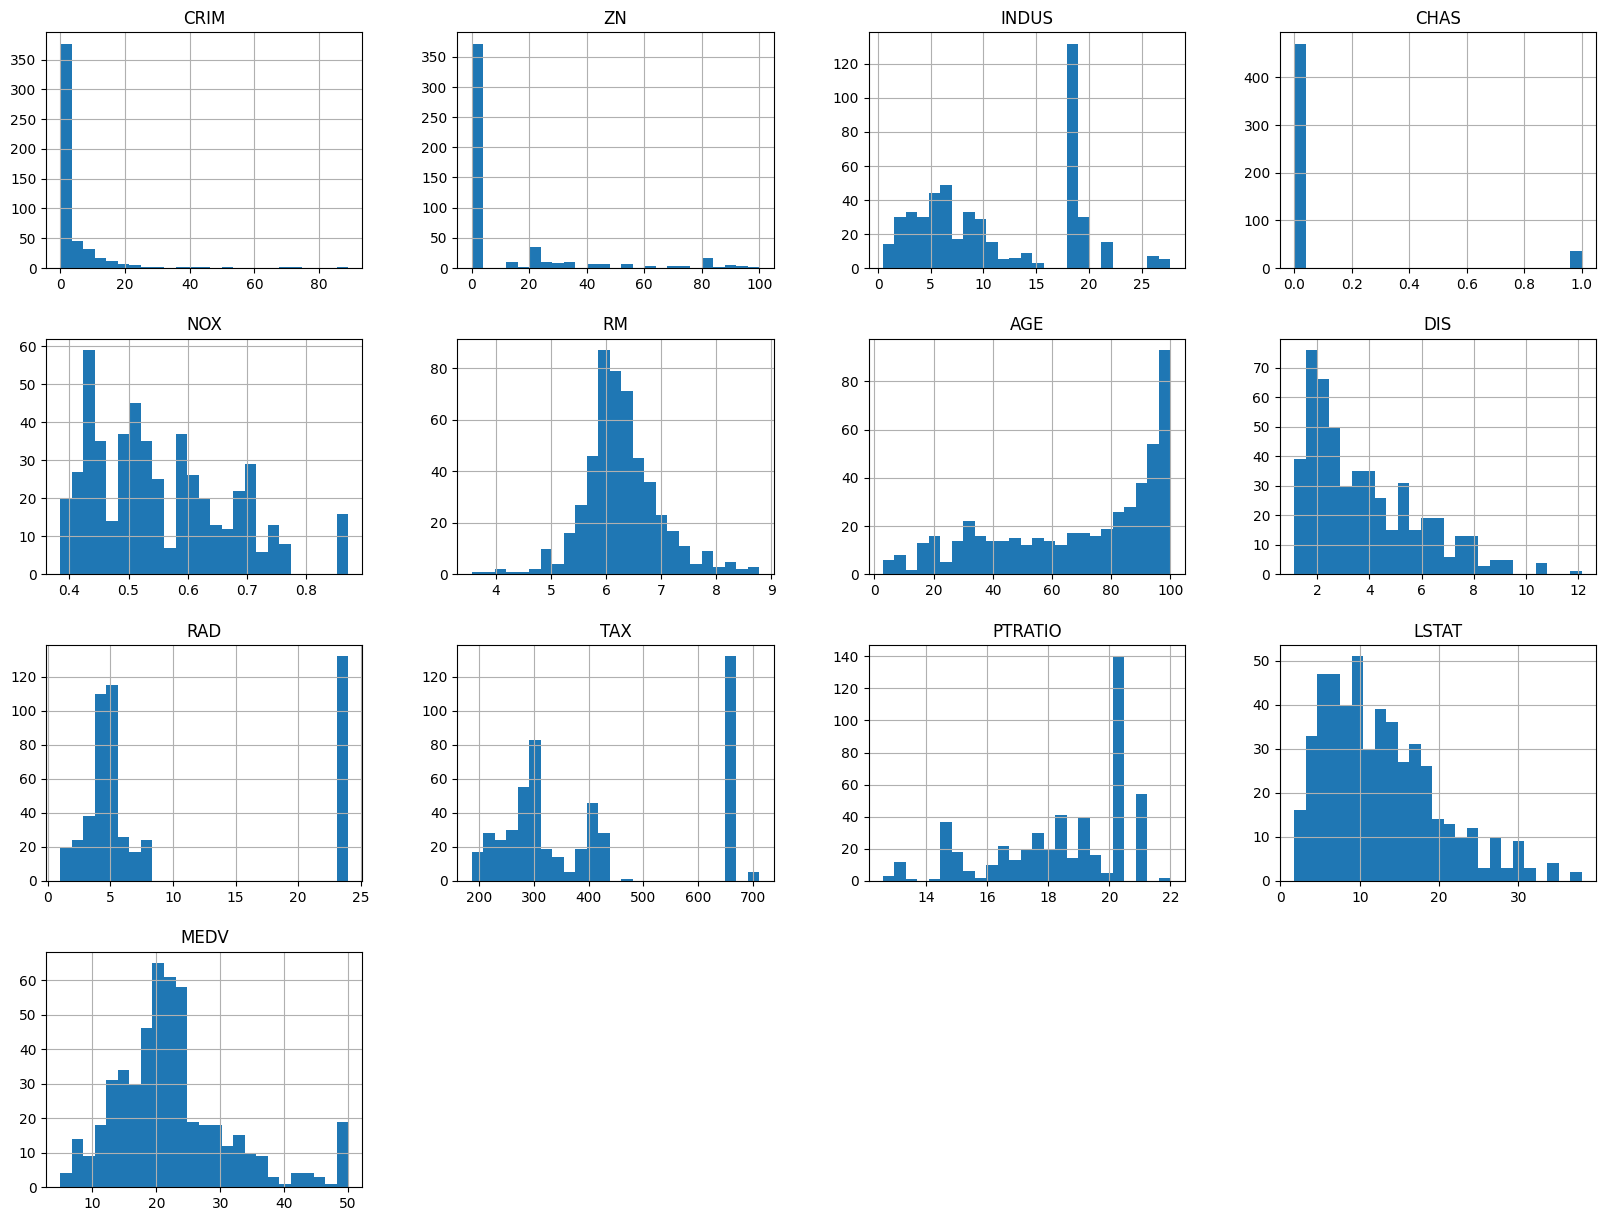

In [8]:
housing.hist(bins=25, figsize=(20,15))

## Train Test Splitting

In [9]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [10]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS'] ):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [12]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [13]:
housing=strat_train_set.copy()

## Looking for Correlations

In [14]:
corr_matrix=housing.corr()


In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [16]:
## pearson correlation coefficient

array([[<AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

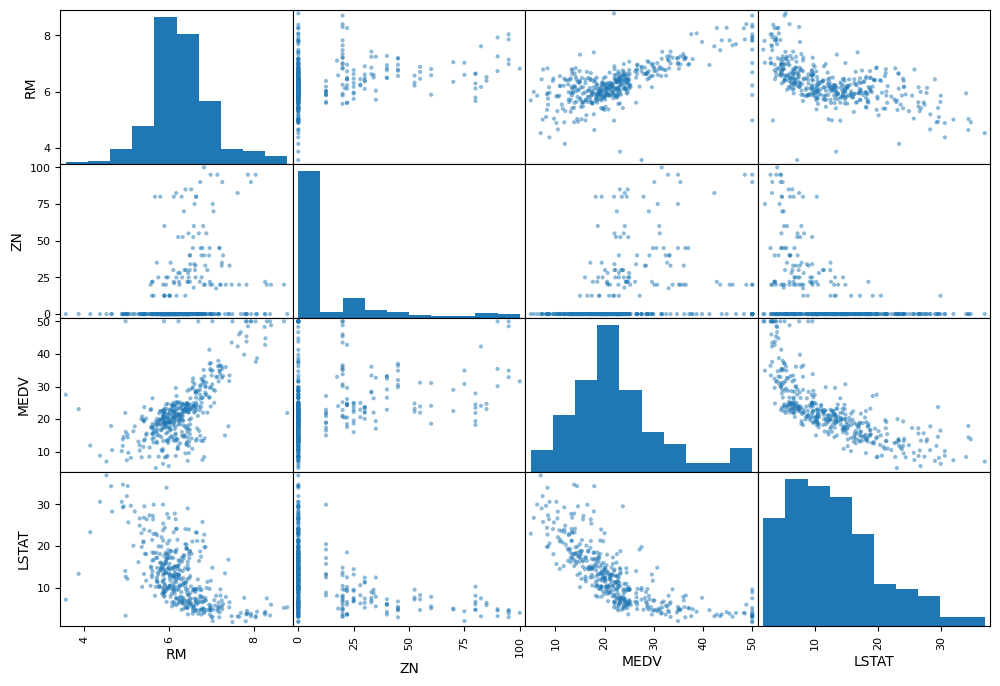

In [17]:
from pandas.plotting import scatter_matrix
attributes=['RM', 'ZN', 'MEDV', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

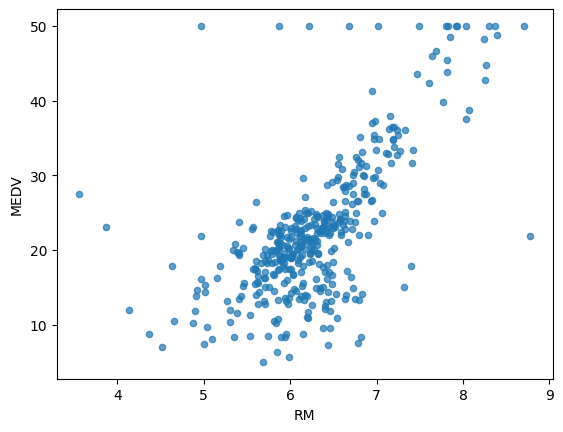

In [18]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.7)

## Attributes combination trial

In [19]:
housing['TAXpr']=housing['TAX']/housing['RM']

In [20]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXpr     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXpr', ylabel='MEDV'>

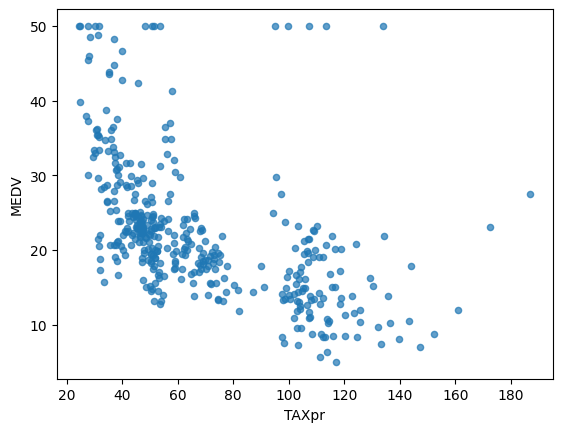

In [21]:
housing.plot(kind='scatter', x='TAXpr', y='MEDV', alpha=0.7)

In [22]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()


## Missing Attributes

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
x=imputer.transform(housing)
housing_tr=pd.DataFrame(x,columns=housing.columns)

In [26]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,36.980000


In [27]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,36.980000


## Pipeline Creation

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [29]:
housing_num_tr= my_pipeline.fit_transform(housing_tr)

In [30]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.5778192 ,
        -0.97491834, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.78557904,
        -0.69277865, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  1.50571521,
         0.81196637,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.80932303,
        -0.22254583, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  1.50571521,
         0.81196637,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.80932303,
        -0.97491834,  0.09940681]])

## Selecting Desired Model

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(housing_num_tr, housing_labels)


LinearRegression()

In [32]:
# from sklearn.tree import DecisionTreeRegressor
# model=DecisionTreeRegressor()
# model.fit(housing_num_tr, housing_labels)

In [33]:
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(housing_num_tr, housing_labels)

In [34]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepare_data=my_pipeline.transform(some_data)
model.predict(prepare_data)

array([24.12043621, 27.22437985, 19.50782625, 25.03454907, 23.65677312])

In [35]:

list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluate the Model

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)

In [37]:
rmse=np.sqrt(mse)

In [38]:
mse

24.020956849849565

## Cross_validation 

In [39]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [40]:
rmse_scores

array([4.11444385, 4.35222675, 4.79805398, 4.12649951, 5.53491236,
       4.50985057, 7.64676557, 5.55701271, 4.1391027 , 6.0271685 ])

In [41]:
def print_scores(scores):
    print("Scores are:", scores)
    print("mean:" ,scores.mean())
    print("Std Deviation: ", scores.std())

In [42]:
print_scores(rmse_scores)

Scores are: [4.11444385 4.35222675 4.79805398 4.12649951 5.53491236 4.50985057
 7.64676557 5.55701271 4.1391027  6.0271685 ]
mean: 5.080603649887473
Std Deviation:  1.0761442207937997


## launching the model

In [43]:
import pickle
pickle.dump(model, open('HousePrices.pkl','wb'))

## Testing Data Check

In [44]:
X_test=strat_test_set.drop("MEDV", axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared= my_pipeline.transform(X_test)
final_predictions= model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

In [45]:
final_rmse

4.1037357293137005

In [46]:
print(final_predictions)

[22.60818482 15.67233359 29.95044681 30.7753723   8.4012358  14.48686657
 17.19967251 16.49654128 32.7324654  36.02983189 15.91734854 -1.14909092
 22.33270709 20.28483791 20.00678707 11.69579859 31.01274121 14.70341156
 24.98791946 23.87888727 20.20942486 16.93329515 13.861656   25.53489182
 22.99514466 32.97724656 18.65266615 33.82114274  6.31129078 34.54947882
 20.03459454 20.70847747 29.35457967 14.45227097 27.74777851 17.13789638
 37.02702178 24.44687886 22.23206979 37.25200109 25.09130334 34.05792896
 22.57094668 23.92319769 18.52278086 32.52352626 38.24980841 21.41657512
 17.36318171 16.59595838 21.00504177 12.4242249  19.64790861 19.42432064
 27.86832501 32.95732408 39.85150181 31.65937459 14.90853238 19.76919409
 40.34079723 16.63633904 15.36631626 27.76981892 18.53834593 32.46971076
 24.91817138 19.39644499 20.71155102 33.84973208 34.79744769 27.79770088
 24.58051279 22.02933519 36.07364239  8.66282483 18.18540927 21.51162516
 20.45977102 23.0143762  26.1455023  22.742519   17

In [47]:
print(Y_test)

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64
